<a href="https://colab.research.google.com/github/El-Ateneo/TP_final_pyton_intermedio_3DF/blob/main/Data_Analytic_%22Amazon_Reviews_2018_Electronics%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

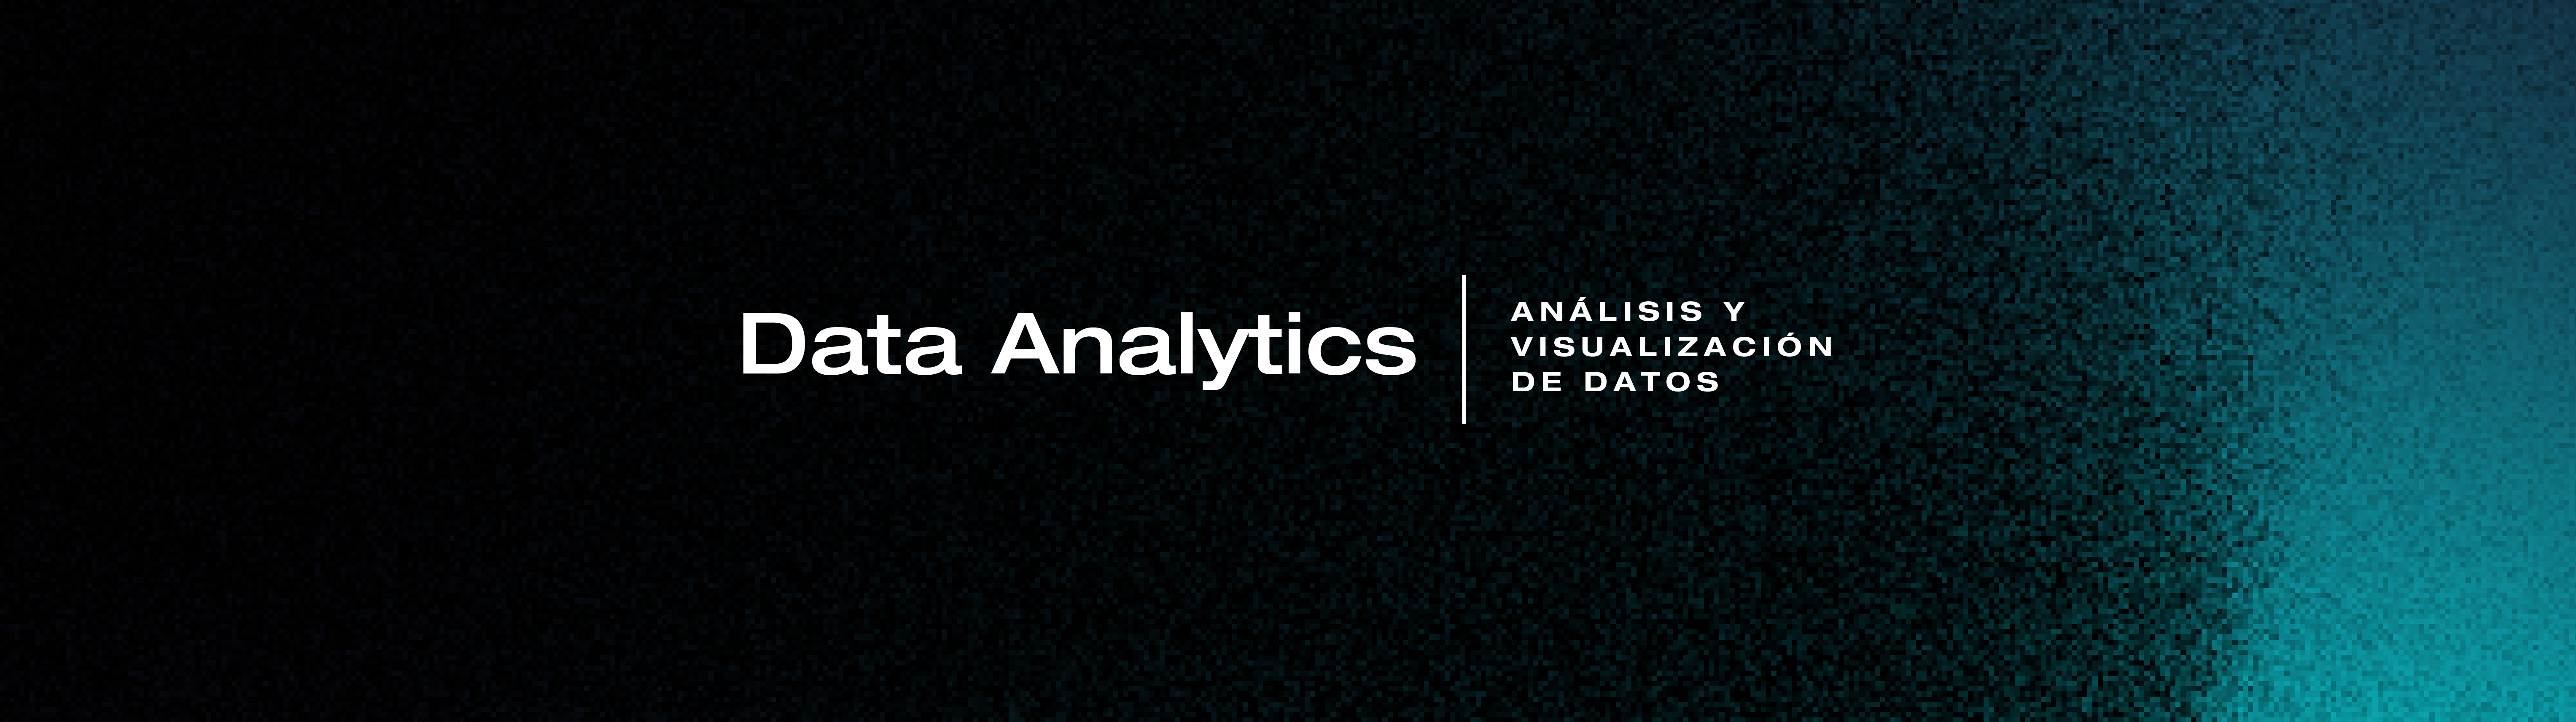

# **"Amazon Reviews 2018 - Electronics"**

---



Librerias y complementos

In [1]:
from google.colab import auth
auth.authenticate_user()

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials


gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link1 = 'https://drive.google.com/file/d/1z8Y8yGKPL4GFOnlNQouYzEuGsQfT-h7i/view?usp=drive_link'


id = link1.split("/")[-2]


downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('electronics_small.csv')



## Librerias

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer

from scipy.stats import mode

# Información genereal del dataset: "Amazon Reviews 2018 - Electronics"

El conjunto de datos con reseñas y calificaciones correspondientes del 1 al 5 se puede utilizar para analizar el comportamiento de los clientes y sus opiniones sobre productos electrónicos.

**Fuente**: https://www.kaggle.com/datasets/magdawjcicka/amazon-reviews-2018-electronics



**Citacion**:

Cite el siguiente documento si utiliza los datos de alguna manera: Justificar recomendaciones utilizando reseñas etiquetadas de forma lejana y aspectos detallados
Jianmo Ni, Jiacheng Li, Julian McAuley
Métodos empíricos en el procesamiento del lenguaje natural (EMNLP), 2019. http://cseweb.ucsd.edu/~jmcauley/pdfs/emnlp19a.pdf



Contexto:

El conjunto de datos es un subconjunto del conjunto de datos de Amazon Review 2018. Los datos utilizados en este proyecto incluyen revisiones de la categoría Electrónica. Estos datos se han reducido para extraer los 5 núcleos, de forma que cada uno de los usuarios y elementos restantes tenga 5 reseñas cada uno. Sólo quedó una parte de los datos.


###  Cargar Dataset
El dataset original posee un total de 3,000,000 Filas y 6 columnas. He decidido carga el dataset completo y luego selecciona una muestra de 50,000 filas, esto con el fin de reducir significativamente el uso de memoria RAM ya que la misma se saturaba al utilizar el dataset completo.
La muestra seguirá siendo representativa del dataset completo.

In [3]:
dfv = pd.read_csv("electronics_small.csv")


**Contenido**

Origen: Extraído del repositorio de Amazon Customer Reviews.

Incluye reseñas y calificaciones correspondientes.
Las columnas son las siguientes:



*   'overall'= general
*   'vote'= votación:calificación del producto (1 a 5)
*   'verified'= verificacion
*   'reviewTex't= textoderevisión
*   'summary'=  resumen de la reseña
*   'reviewTim'e= tiempo de revisión









# **Exploración inicial del dataset**

### Número de filas y columnas

In [4]:
print(f"Filas y columnas del archivo: {dfv.shape}")

Filas y columnas del archivo: (3000000, 6)


In [5]:
print(f"Columnas: {dfv.columns}")


Columnas: Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewText', 'summary'], dtype='object')


Seleccionar 50,000 filas de manera aleatoria para el dataset reducido.

In [4]:
dfv_sample = dfv.sample(n=50000, random_state=42)
print(f"Filas y columnas del nuevo dataset: {dfv_sample.shape}")

Filas y columnas del nuevo dataset: (50000, 6)


creamos un nuevo archivo y reemplazamos el original por el reducido

In [5]:
dfv_sample.to_csv('electronics_sample.csv', index=False)


In [6]:
dfv = pd.read_csv('electronics_sample.csv')
print(f"Filas y columnas del archivo reducido: {dfv.shape}")


Filas y columnas del archivo reducido: (50000, 6)


### Información de las variables

In [7]:
print("\nInformación del dataset:")
dfv.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overall     50000 non-null  int64 
 1   vote        50000 non-null  int64 
 2   verified    50000 non-null  bool  
 3   reviewTime  50000 non-null  object
 4   reviewText  49995 non-null  object
 5   summary     49999 non-null  object
dtypes: bool(1), int64(2), object(3)
memory usage: 2.0+ MB


# **Análisis Básico**

Descripción

In [8]:
dfv.describe()

,overall,vote
count,50000.000000,50000.000000
mean,4.268060,1.800060
std,1.196809,18.743379
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,2079.000000


Valores nulos

In [9]:
valores_nulos = dfv.isnull().sum()
print(f"\nValores nulos por columna:\n\n{valores_nulos}")


Valores nulos por columna:

overall       0
vote          0
verified      0
reviewTime    0
reviewText    5
summary       1
dtype: int64


Filas repetidas

In [10]:
dfv[dfv.duplicated()]

,overall,vote,verified,reviewTime,reviewText,summary
816,5,0,True,2014-11-24,Five Stars,1416787200
964,5,0,True,2017-01-09,Five Stars,1483920000
988,5,0,True,2014-11-21,Five Stars,1416528000
1367,5,0,True,2015-05-31,Five Stars,1433030400
1409,5,0,True,2015-06-29,Five Stars,1435536000
...,...,...,...,...,...,...
49970,5,0,True,2016-08-16,Five Stars,1471305600
49973,5,0,True,2015-10-19,Five Stars,1445212800
49977,5,0,True,2014-10-06,Five Stars,1412553600
49980,5,0,True,2014-07-15,Five Stars,1405382400


In [11]:
duplicados = dfv.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicados}")


Número de filas duplicadas: 2537


# **Analisis de las Variables mas Relevantes**

### Calificaciones generales ("overall")
Comenzaremos explorando la distribución de calificaciones para entender cómo los usuarios evalúan los productos.

Conteo de calificaciones

In [12]:
calificaciones = dfv['overall'].value_counts()
print("\nDistribución de calificaciones:")
print(calificaciones)


Distribución de calificaciones:
overall
5    31863
4     8735
3     3729
1     3385
2     2288
Name: count, dtype: int64


Gráfico de barras

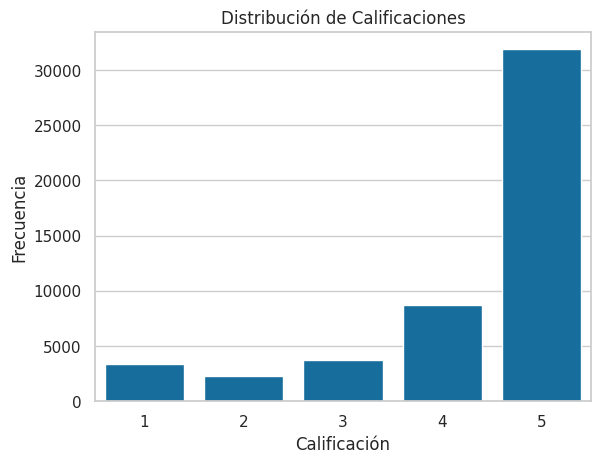

In [13]:
sns.set(style="whitegrid", palette="colorblind")
sns.countplot(data=dfv, x='overall')
plt.title("Distribución de Calificaciones")
plt.xlabel("Calificación")
plt.ylabel("Frecuencia")
plt.show()



> *La mayoría de las calificaciones son positivas, con predominio de 4 y 5 estrellas. Esto sugiere una tendencia favorable en las reseñas. Las calificaciones bajas son menos comunes, pero podrían representar insatisfacción puntual con productos o servicios específicos.*






### Longitud de reseñas ("reviewText")
Exploraremos cómo la longitud de las reseñas varía según las calificaciones.


Nueva columna con la longitud de las reseñas

In [14]:
dfv['review_length'] = dfv['reviewText'].apply(lambda x: len(str(x)))

Boxplot por calificación

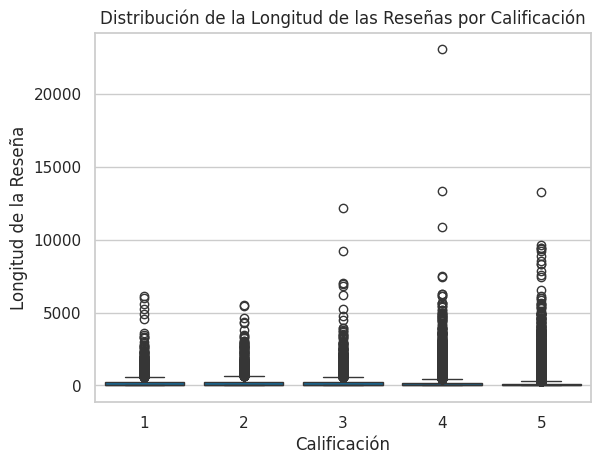

In [15]:
sns.boxplot(data=dfv, x='overall', y='review_length')
plt.title("Distribución de la Longitud de las Reseñas por Calificación")
plt.xlabel("Calificación")
plt.ylabel("Longitud de la Reseña")
plt.show()



> *La longitud de las reseñas parece ser mayor para calificaciones extremas (1 y 4-5 estrellas), lo que podría indicar que los usuarios escriben más cuando están muy satisfechos o muy insatisfechos.*



### Análisis de palabras comunes en reseñas positivas y negativas
Utilizaremos mapa de calor para una comparación rápida y clara de frecuencias entre palabras positivas y negativas.

columna de sentimiento segun su calificacion

In [16]:
def classify_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score <= 2:
        return 'negative'
    else:
        return 'neutral'

dfv['Sentiment'] = dfv['overall'].apply(classify_sentiment)


In [46]:

dfv['reviewText'] = dfv['reviewText'].fillna('')


positive_keywords = ["excellent", "good", "amazing", "satisfied", "love", "perfect", "happy", "recommend"]
negative_keywords = ["bad", "defective", "problem", "disappointed", "worst", "poor", "terrible", "broken"]


positive_reviews = (
    dfv[dfv['Sentiment'] == 'positive']['reviewText']
    .str.split(expand=True)
    .stack()
    .value_counts()
    .loc[positive_keywords]
    .fillna(0)
)

negative_reviews = (
    dfv[dfv['Sentiment'] == 'negative']['reviewText']
    .str.split(expand=True)
    .stack()
    .value_counts()
    .loc[negative_keywords]
    .fillna(0)
)

DataFrame para de palabras positivas y negativas

In [47]:
positive_data = positive_reviews.to_frame(name='Positive')

negative_data = negative_reviews.to_frame(name='Negative')

**Mapa de Calor**

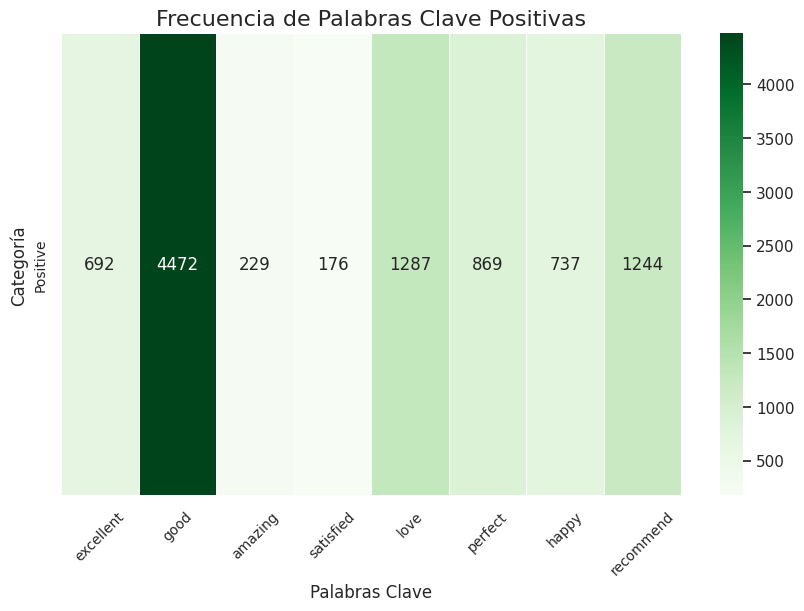

#


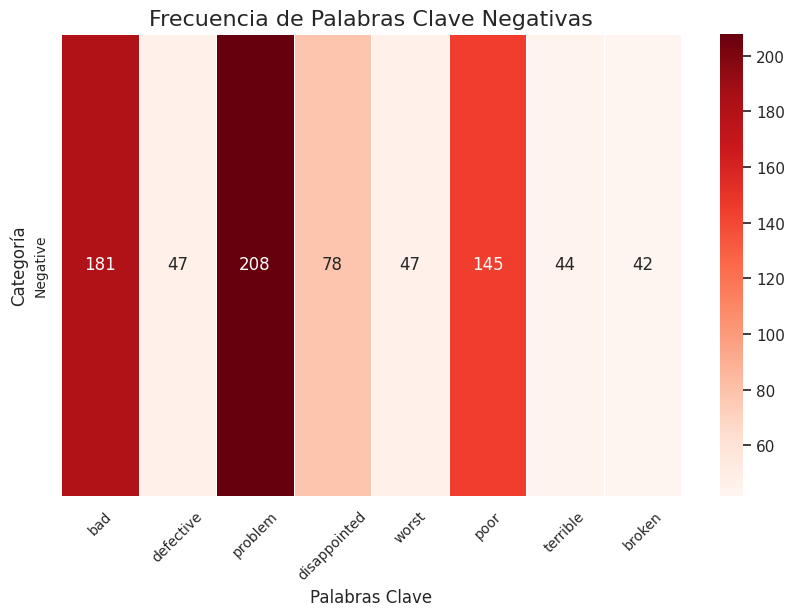

In [48]:
plt.figure(figsize=(10, 6))
sns.heatmap(positive_data.T, annot=True, fmt='.0f', cmap='Greens', cbar=True, linewidths=0.5)
plt.title('Frecuencia de Palabras Clave Positivas', fontsize=16)
plt.ylabel('Categoría', fontsize=12)
plt.xlabel('Palabras Clave', fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

print("#")

plt.figure(figsize=(10, 6))
sns.heatmap(negative_data.T, annot=True, fmt='.0f', cmap='Reds', cbar=True, linewidths=0.5)
plt.title('Frecuencia de Palabras Clave Negativas', fontsize=16)
plt.ylabel('Categoría', fontsize=12)
plt.xlabel('Palabras Clave', fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()


En esteb mapa de calor muestra se puede observar la frecuencia de palabras clave utilizadas en las reseñas, dividiendo los comentarios en dos categorías principales: positivos y negativos.

>*Reseñas positivas: Palabras como good "bueno", recommend "recomendado" y love "amo" son comunes, lo que refuerza que los usuarios tienden a describir sus experiencias de manera positiva y  reflejando su satisfacción con el producto*



> *Reseñas negativas: Términos como problem "problemas", bad "malo" y poor "pobre" destacan, indicando preocupaciones específicas relacionadas con la calidad o funcionamiento del producto, sugiriendo que los inconvenientes o fallas específicas suelen ser el principal motivo de insatisfacción..*



# **Dataset Original**

>*Este análisis preliminar del dataset "Amazon Electronics Reviews" muestra tendencias claras en las reseñas. La mayoría de los usuarios están satisfechos, pero las críticas negativas suelen estar relacionadas con problemas específicos. Los gráficos de distribución ayudan a identificar patrones en las calificaciones, mientras que el análisis textual proporciona insights sobre las principales preocupaciones y elogios de los clientes.*

Columnas numéricas: ['overall', 'vote', 'reviewTime', 'reviewText', 'summary', 'review_length', 'Sentiment']


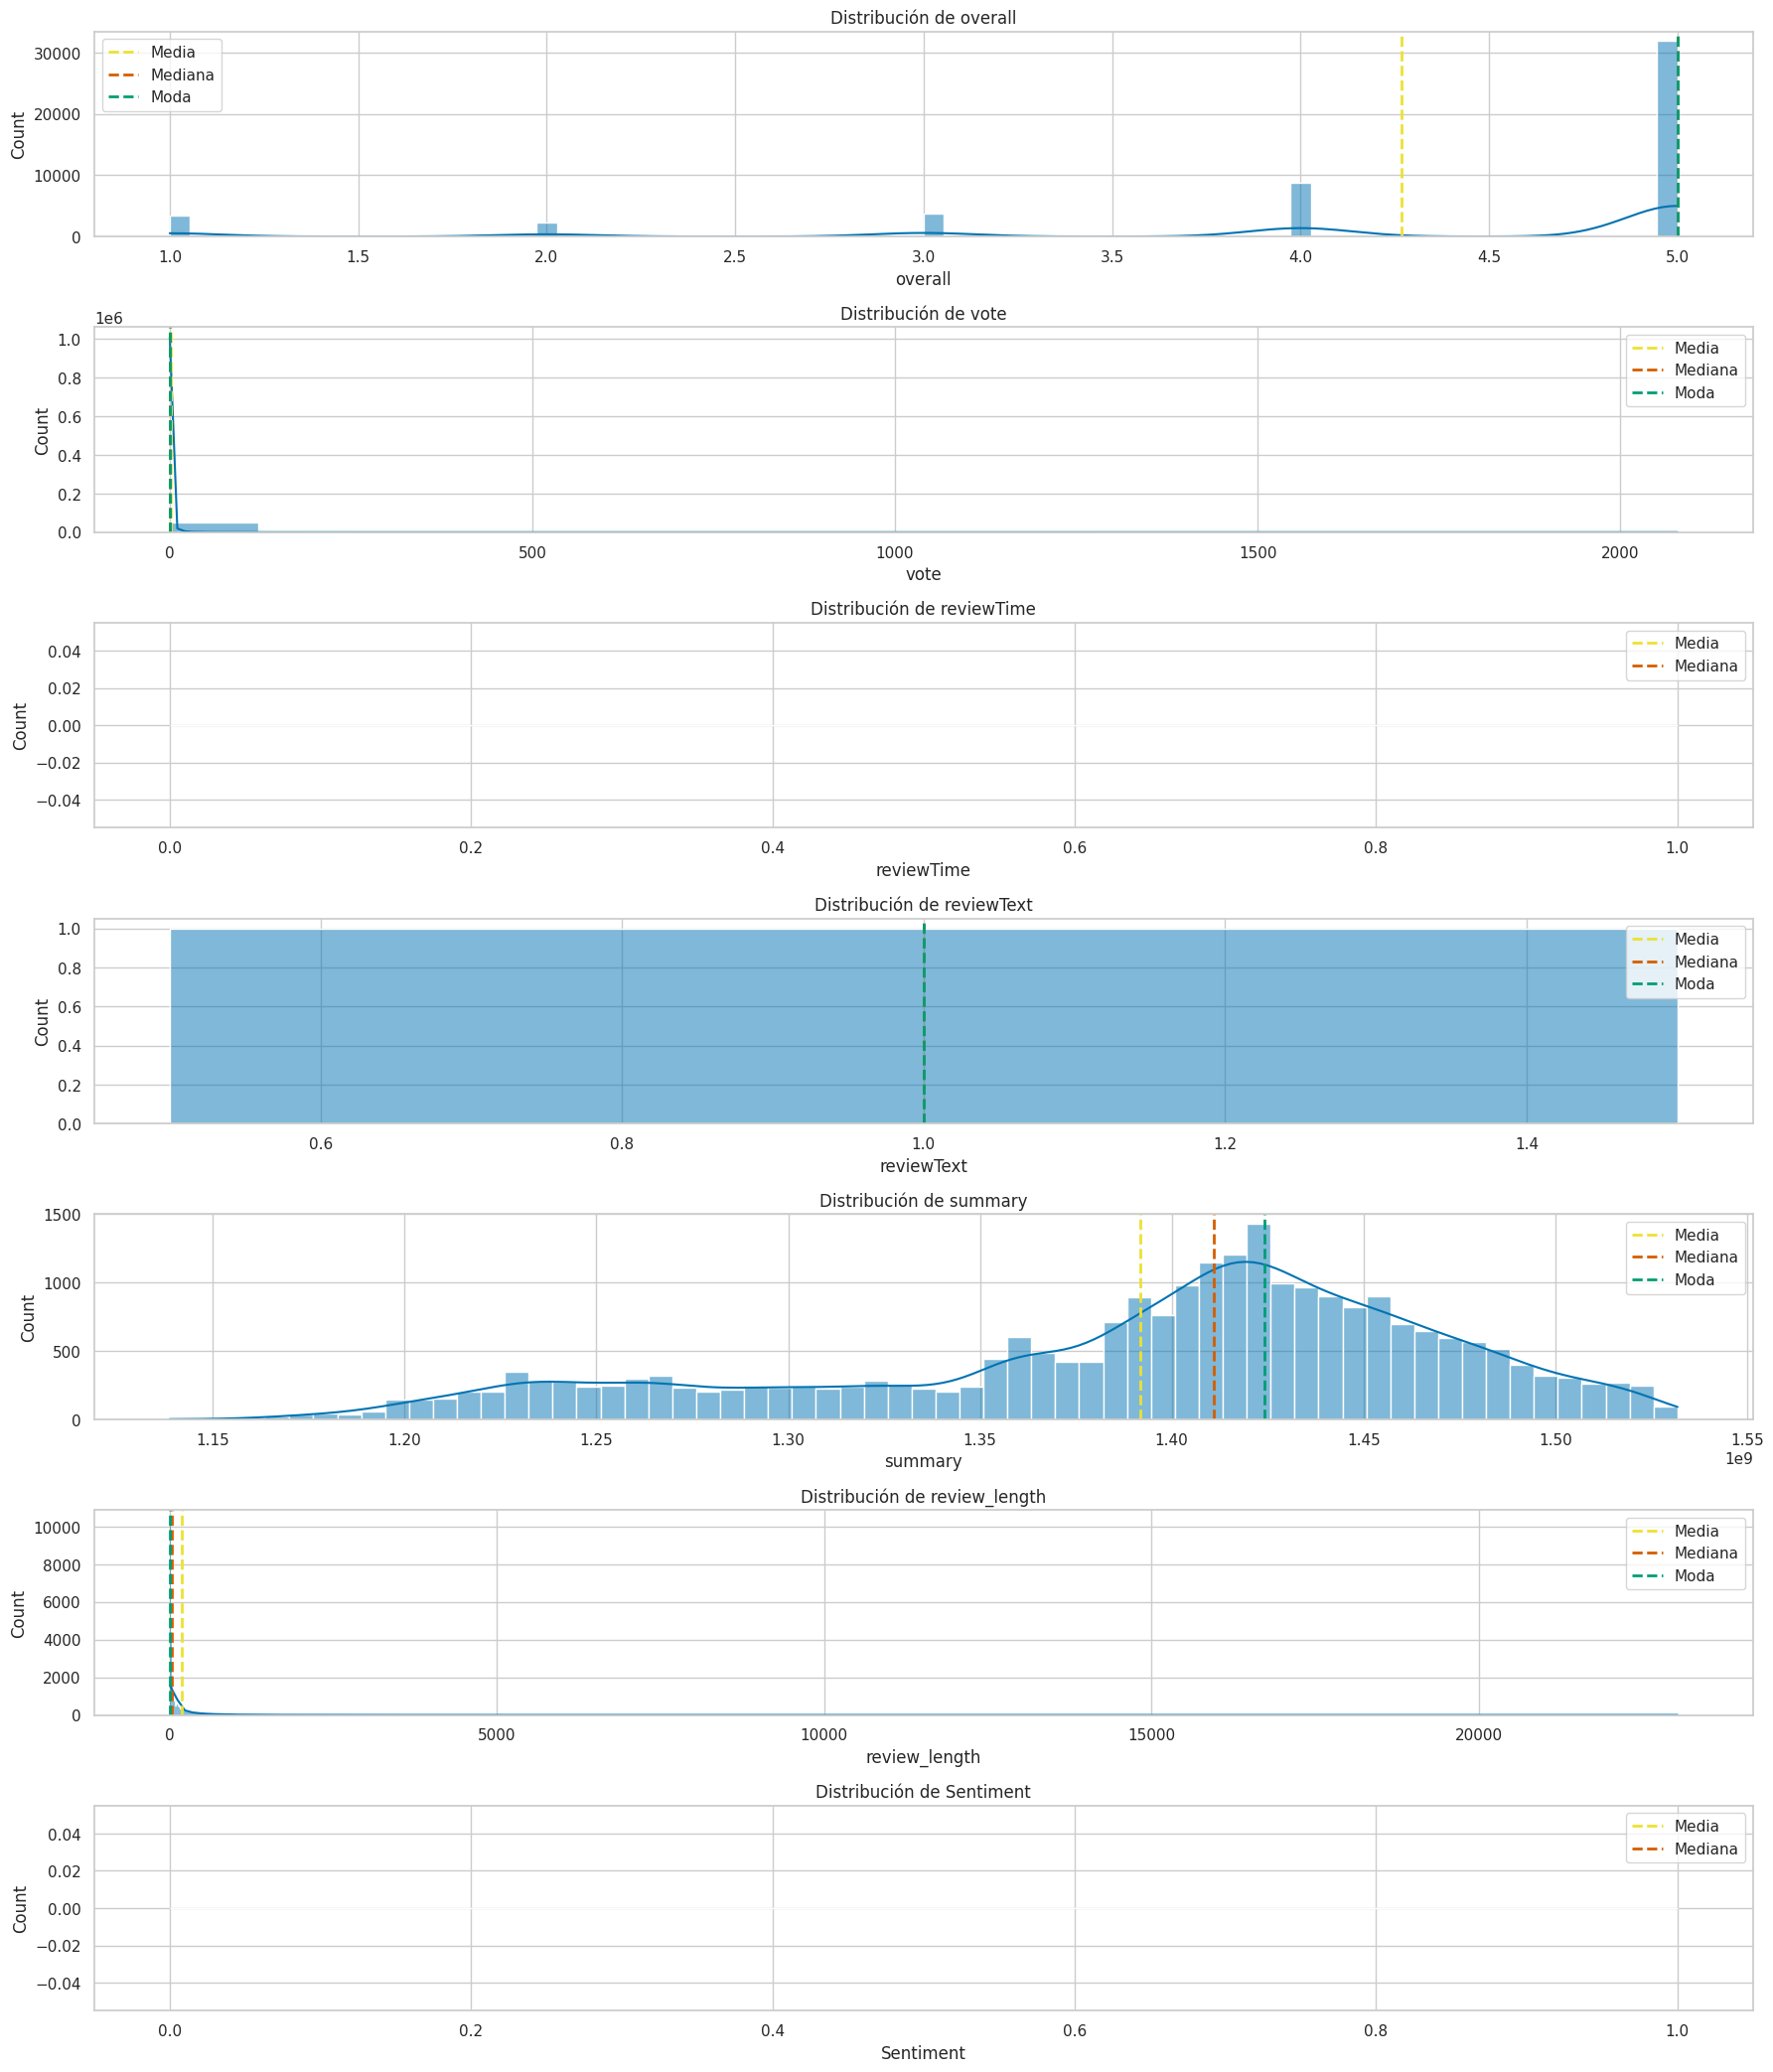

In [55]:

variables = dfv.select_dtypes(include=[np.number]).columns.tolist()
print("Columnas numéricas:", variables)

fig = plt.figure(figsize=(18, len(variables) * 3))
for index, variable in enumerate(variables):
    media = dfv[variable].mean()
    mediana = dfv[variable].median()
    mode_values = dfv[variable].mode()
    moda = mode_values[0] if not mode_values.empty else None

    plt.subplot(len(variables), 1, index+1)
    sns.histplot(dfv[variable], kde=True)
    plt.axvline(media, color='y', linestyle='dashed', linewidth=2, label='Media')
    plt.axvline(mediana, color='r', linestyle='dashed', linewidth=2, label='Mediana')
    if moda is not None:
        plt.axvline(moda, color='g', linestyle='dashed', linewidth=2, label='Moda')
    plt.title(f"Distribución de {variable}")
    plt.legend()

fig.tight_layout(pad=1.0)
plt.show()


# **# Preguntas a responder**



1.   ¿Qué características de los productos electrónicos se mencionan más frecuentemente en las reseñas positivas y negativas?
2.   ¿Qué productos tienden a recibir más calificaciones extremas (1 estrella o 5 estrellas)?
3.   ¿Existe alguna relación entre la longitud de una reseña y la calificación otorgada?



Repuestas:
1.   - En las reseñas positivas, los usuarios suelen mencionar la calidad, la funcionalidad y el precio como puntos clave.
    -En las negativas, se destacan problemas relacionados con defectos, mal embalaje o fallas técnicas.

2.   Los productos más nuevos y populares tienen más calificaciones de 5 estrellas, mientras que productos con especificaciones desactualizadas o problemas de calidad tienden a recibir 1 estrella.

3.   Sí, las reseñas más largas tienden a estar asociadas con calificaciones extremas (1 o 5 estrellas), posiblemente porque los usuarios sienten la necesidad de justificar tanto su satisfacción como su insatisfacción.